# KPMG AU Data Analytics virtual internship

## Task 2 - Data Insights

##### Targeting high value customers based on customer demographics and attributes.

##### Here is the background information on your task

Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.


##### Here is your task
For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

In [1]:
#including headers
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

In [2]:
#Reading given data

data = pd.ExcelFile("KPMG1.xlsx")

In [3]:
#separating datasets

Transactions = pd.read_excel(data, 'Transactions')
NewCustomerList = pd.read_excel(data, 'NewCustomerList')
CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')
CustomerAddress = pd.read_excel(data, 'CustomerAddress')

## Age Distribution

In [4]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.66,0.8250,1.03125,0.876563,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.85,0.8500,1.06250,0.903125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.87,0.8700,0.87000,0.870000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.77,0.9625,0.96250,0.962500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.72,0.7200,0.90000,0.900000,4,4,1.703125


In [6]:
#Converting DOB to Age

NewCustomerList['AGE'] = (pd.to_datetime('today').year - pd.DatetimeIndex(NewCustomerList['DOB']).year )

In [7]:
NewCustomerList['AGE']

0      66.0
1      53.0
2      49.0
3      44.0
4      58.0
       ... 
995    64.0
996    22.0
997    69.0
998    71.0
999    68.0
Name: AGE, Length: 1000, dtype: float64

In [8]:
#Grouping the age

NewCustomerList['Age_group'] = pd.cut(NewCustomerList['AGE'], bins=[0,20,40,60,70,100], labels=["Kids", "Young", "Middle Aged","Old","Very Old"])

In [9]:
NewCustomerList['Age_group']

0              Old
1      Middle Aged
2      Middle Aged
3      Middle Aged
4      Middle Aged
          ...     
995            Old
996          Young
997            Old
998       Very Old
999            Old
Name: Age_group, Length: 1000, dtype: category
Categories (5, object): ['Kids' < 'Young' < 'Middle Aged' < 'Old' < 'Very Old']

In [10]:
NewCustomerList['Age_group'].value_counts()

Middle Aged    398
Young          250
Old            170
Very Old       165
Kids             0
Name: Age_group, dtype: int64

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

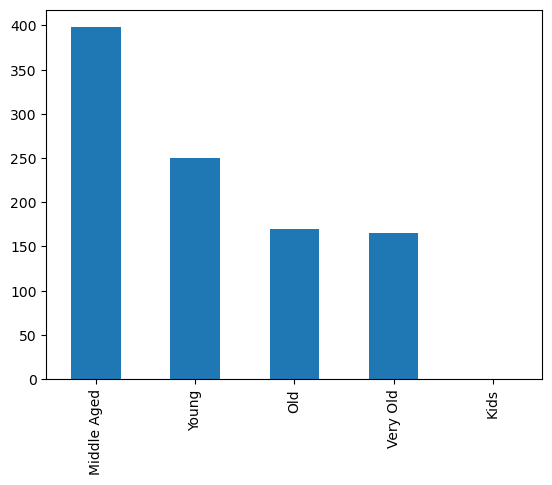

In [12]:
NewCustomerList['Age_group'].value_counts().plot(kind = 'bar')

**Middle Aged** people have purchased high amount of bike in past 3 year. People from age **40 to 60** are potential customers.

## Bike Purchase

In [13]:
NewCustomerList['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

<AxesSubplot:>

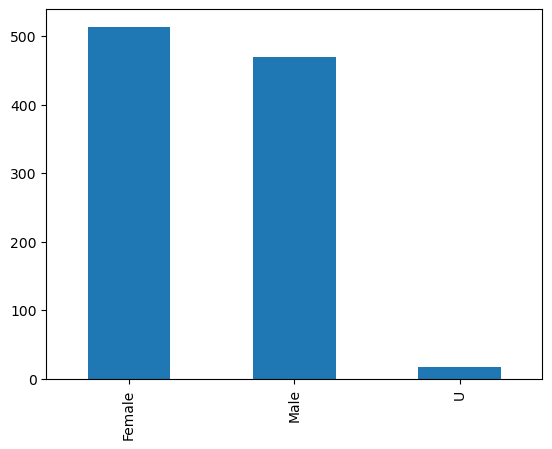

In [14]:
NewCustomerList['gender'].value_counts().plot(kind = 'bar')

**Female** are the highest contributer by gender

## Job Industry

In [15]:
NewCustomerList['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

<AxesSubplot:>

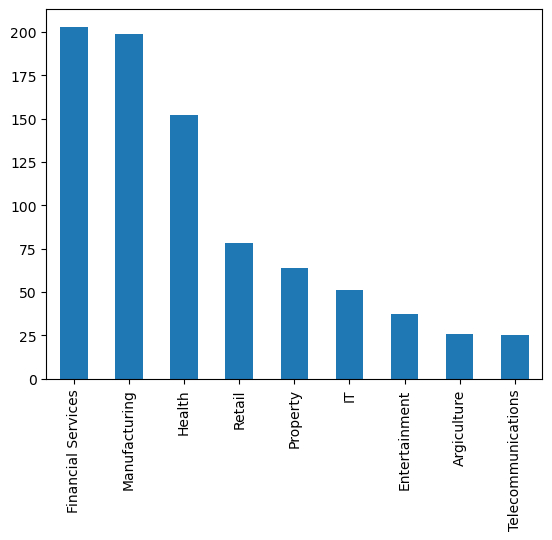

In [16]:
NewCustomerList['job_industry_category'].value_counts().plot(kind = 'bar')

**Financial Services, Manufacturing** and **Health** are 3 industries that contributes the bike purchase in past 3 years.

## Number of Cars owned

In [17]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [18]:
newdf = Transactions.merge(CustomerDemographic, how='right')

In [19]:
newdf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,94.0,86.0,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,3765.0,38.0,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,5157.0,47.0,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
3,9785.0,72.0,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
4,13424.0,2.0,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0


In [20]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  float64       
 1   product_id                           19997 non-null  float64       
 2   customer_id                          20504 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19637 non-null  float64       
 5   order_status                         19997 non-null  object        
 6   brand                                19800 non-null  object        
 7   product_line                         19800 non-null  object        
 8   product_class                        19800 non-null  object        
 9   product_size                         19800 non-null  object        
 10  list_price

In [22]:
newdf['Profit'] = newdf['list_price'] - newdf['standard_cost']

<AxesSubplot:xlabel='job_industry_category'>

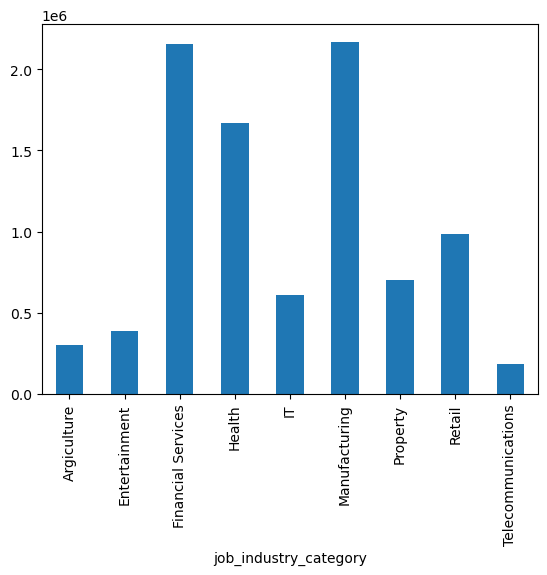

In [23]:
newdf.groupby('job_industry_category')['Profit'].sum().plot( kind = 'bar')

**Financial Services, Manufacturing** and **Health** are 3 industries that contributes based on the profit.

In [24]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [25]:
newdf2 = newdf.merge(CustomerAddress, how='right')

In [26]:
newdf2.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,default,owns_car,tenure,Profit,address,postcode,state,country,property_valuation
0,94.0,86.0,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,N,"""'",Yes,11.0,110.56,060 Morning Avenue,2016,New South Wales,Australia,10
1,3765.0,38.0,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,N,"""'",Yes,11.0,751.02,060 Morning Avenue,2016,New South Wales,Australia,10
2,5157.0,47.0,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,N,"""'",Yes,11.0,189.28,060 Morning Avenue,2016,New South Wales,Australia,10
3,9785.0,72.0,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,N,"""'",Yes,11.0,90.10,060 Morning Avenue,2016,New South Wales,Australia,10
4,13424.0,2.0,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,N,"""'",Yes,11.0,17.87,060 Morning Avenue,2016,New South Wales,Australia,10


In [27]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20478 entries, 0 to 20477
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  float64       
 1   product_id                           19968 non-null  float64       
 2   customer_id                          20478 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

In [31]:
newdf2['state'].value_counts()

NSW                10474
VIC                 4682
QLD                 4357
New South Wales      485
Victoria             480
Name: state, dtype: int64

In [33]:
newdf2['state'] = newdf2['state'].replace(['New South Wales'], 'NSW').replace(['Victoria'],'VIC')

<AxesSubplot:>

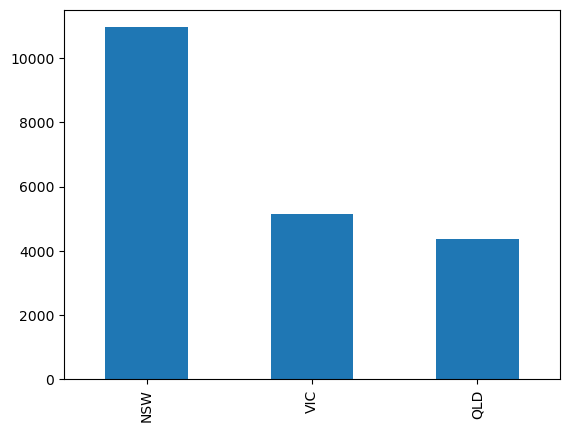

In [34]:
newdf2['state'].value_counts().plot(kind='bar')

**NSW** has the largest customer base followed by **VIC** and **QLD**